# Daten Auswertung FOM Umfrage

In [25]:
# Matplotlib config
%matplotlib inline

# SVG-Anzeige anschalten
%config InlineBackend.figure_formats = ['retina']

# Größe definieren
%config InlineBackend.rc = {'figure.figsize': (15.0, 10.0)}

# Module importieren
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv("Gesundheitsreport.csv", sep = ";") # CSV-Datei einlesen

#df.info()

df_red = df[["Ausgaben_Arzt", "Ausgaben_Apotheke", "Ausgaben_Ernaeherung", 
            "Ausgaben_Gesundheitskurse", "Ausgaben_Literatur", 
            "Ausgaben_Fitness_Sport", "Ausgaben_Wellness", "Ausgaben_Tracker", 
            "Googeln_verunsichert", "Geschlecht", "Alter", "Semester", "Einkommen"]].dropna()

df_red["Ausgaben_Gesundheit_Gesamt"] = df_red.iloc[:, 0:7].sum(axis = 1) #Gesamtausgaben für Gesundheit (Spalten 1-8) zusammengefasst

df_red = df_red[["Googeln_verunsichert", "Geschlecht", "Alter", "Semester", "Einkommen", "Ausgaben_Gesundheit_Gesamt"]]


df_red = df_red[df_red["Alter"] >= df_red["Alter"].quantile(0.025)]
df_red = df_red[df_red["Alter"] <= df_red["Alter"].quantile(0.975)]
df_red = df_red[df_red["Ausgaben_Gesundheit_Gesamt"] <= df_red["Ausgaben_Gesundheit_Gesamt"].quantile(0.975)]

df_red.loc[df_red["Geschlecht"] == 1, "Geschlecht"] = "männlich"
df_red.loc[df_red["Geschlecht"] == 0, "Geschlecht"] = "weiblich"


df_red.loc[df_red["Googeln_verunsichert"] == 1, "Googeln_verunsichert"] = "trifft voll zu"
df_red.loc[df_red["Googeln_verunsichert"] == 2, "Googeln_verunsichert"] = "trifft eher zu"
df_red.loc[df_red["Googeln_verunsichert"] == 3, "Googeln_verunsichert"] = "trifft teilweise zu"
df_red.loc[df_red["Googeln_verunsichert"] == 4, "Googeln_verunsichert"] = "trifft eher nicht zu"
df_red.loc[df_red["Googeln_verunsichert"] == 5, "Googeln_verunsichert"] = "trifft überhaupt nicht zu"

df_red.loc[df_red["Einkommen"] == 1, "Einkommen"] = "<500"
df_red.loc[df_red["Einkommen"] == 2, "Einkommen"] = "<1000"
df_red.loc[df_red["Einkommen"] == 3, "Einkommen"] = "<1500"
df_red.loc[df_red["Einkommen"] == 4, "Einkommen"] = "<2000"
df_red.loc[df_red["Einkommen"] == 5, "Einkommen"] = "<2500"
df_red.loc[df_red["Einkommen"] == 6, "Einkommen"] = "<3000"
df_red.loc[df_red["Einkommen"] == 7, "Einkommen"] = "<3500"
df_red.loc[df_red["Einkommen"] == 8, "Einkommen"] = "<4000"
df_red.loc[df_red["Einkommen"] == 9, "Einkommen"] = "<4500"
df_red.loc[df_red["Einkommen"] == 10, "Einkommen"] = ">=4500"

df_red.loc[df_red["Semester"] == 1, "Semester"] = "1-2"
df_red.loc[df_red["Semester"] == 2, "Semester"] = "3-4"
df_red.loc[df_red["Semester"] == 3, "Semester"] = "5-6"
df_red.loc[df_red["Semester"] == 4, "Semester"] = "7-8"
df_red.loc[df_red["Semester"] == 5, "Semester"] = ">8"



df_red.head()

,Googeln_verunsichert,Geschlecht,Alter,Semester,Einkommen,Ausgaben_Gesundheit_Gesamt
1,trifft eher nicht zu,weiblich,42.0,5-6,<3000,29.0
3,trifft eher nicht zu,weiblich,28.0,1-2,<1500,70.0
4,trifft eher zu,männlich,30.0,1-2,<2000,25.0
5,trifft eher nicht zu,weiblich,37.0,5-6,<2000,120.0
6,trifft teilweise zu,weiblich,23.0,1-2,<1500,60.0


# Hypothese 1: Die Ausgaben für Gesundheit steigen linear mit dem Alter

## XY-Plot der Ausgaben für Gesundheit in Abhängigkeit des Alters

In [26]:
for age in df_red["Alter"].unique():
    df_red.loc[(df_red["Alter"] == age) & (df_red["Geschlecht"]=="weiblich"), "Ausgaben_Alter_Mean"] = df_red.loc[(df_red["Alter"] == age) & (df_red["Geschlecht"]=="weiblich"), "Ausgaben_Gesundheit_Gesamt"].mean()
    df_red.loc[(df_red["Alter"] == age) & (df_red["Geschlecht"]=="männlich"), "Ausgaben_Alter_Mean"] = df_red.loc[(df_red["Alter"] == age) & (df_red["Geschlecht"]=="männlich"), "Ausgaben_Gesundheit_Gesamt"].mean()

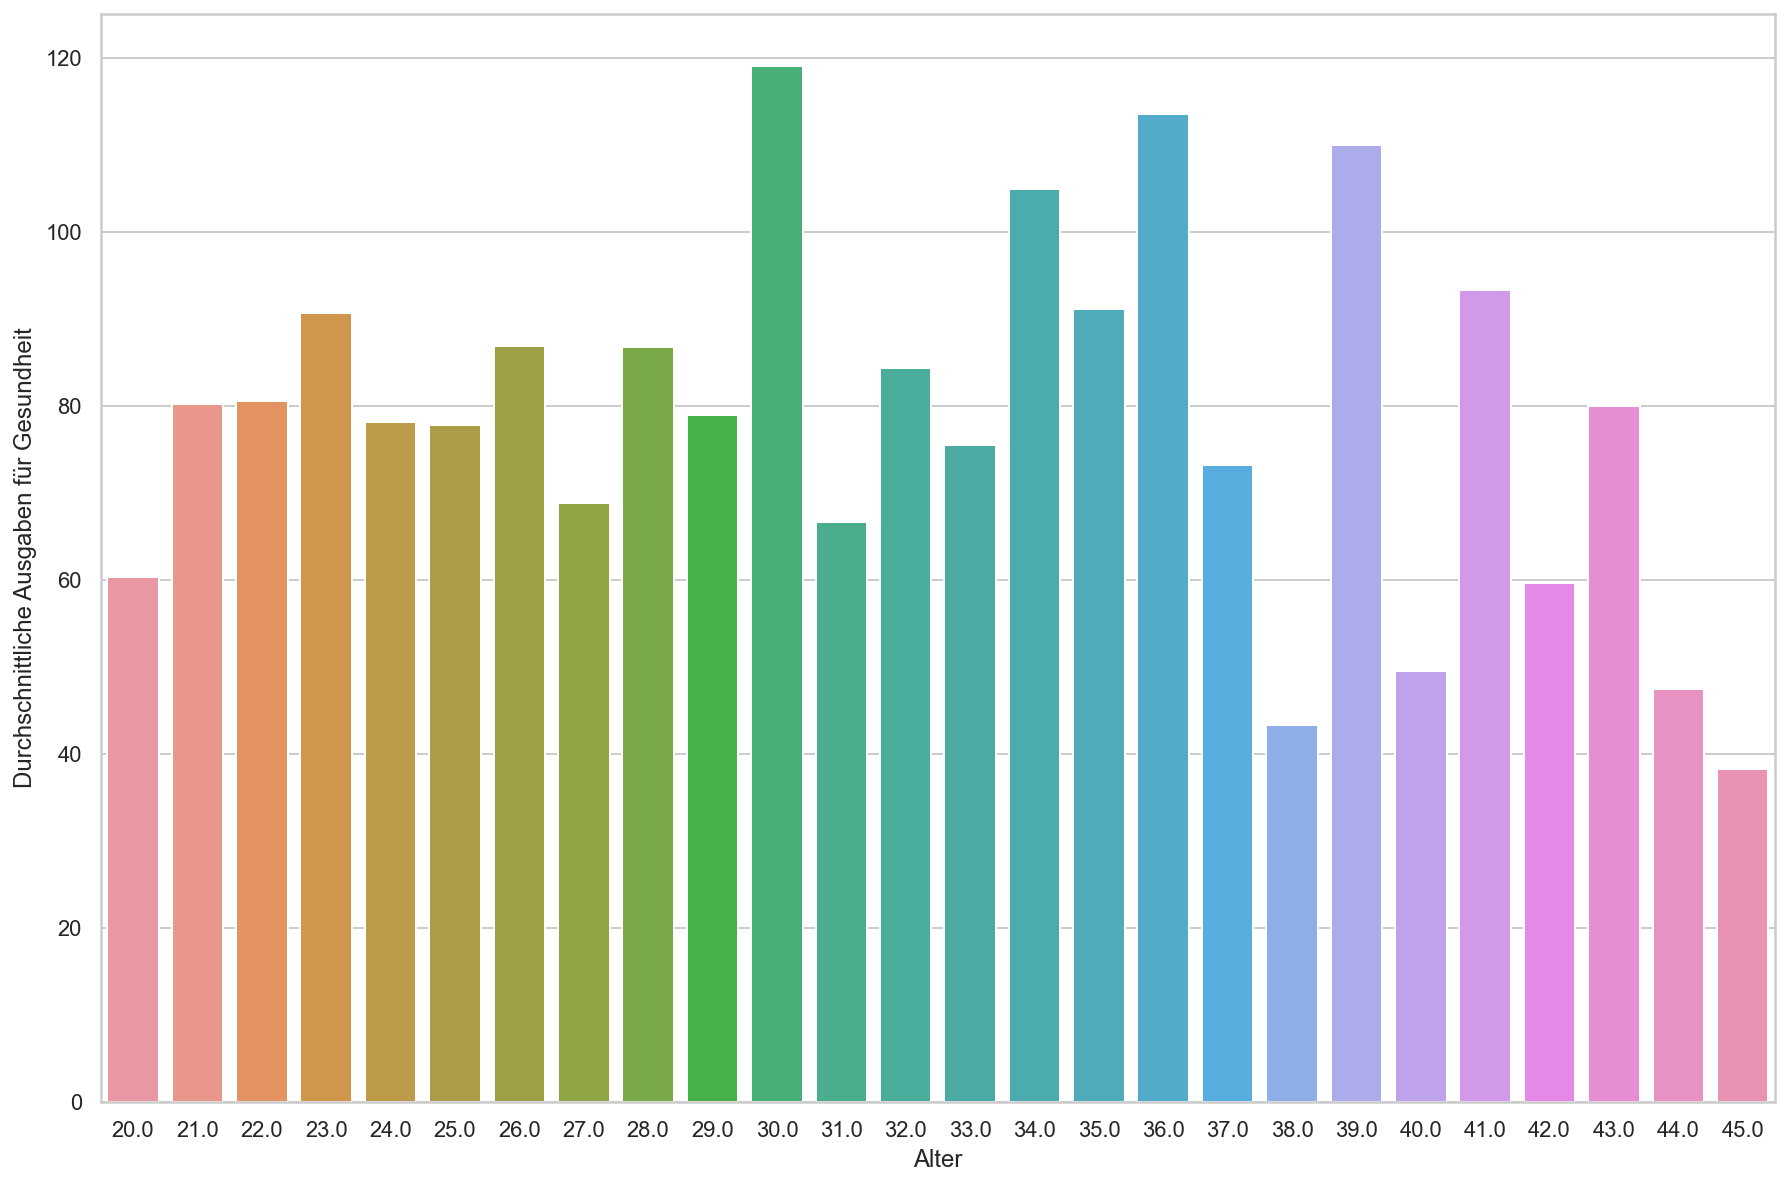

In [27]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = df_red["Alter"], y = df_red["Ausgaben_Alter_Mean"], ci=None)
ax.set(ylabel="Durchschnittliche Ausgaben für Gesundheit")
plt.show()

## XY-Plot nach Geschlecht unterteilt

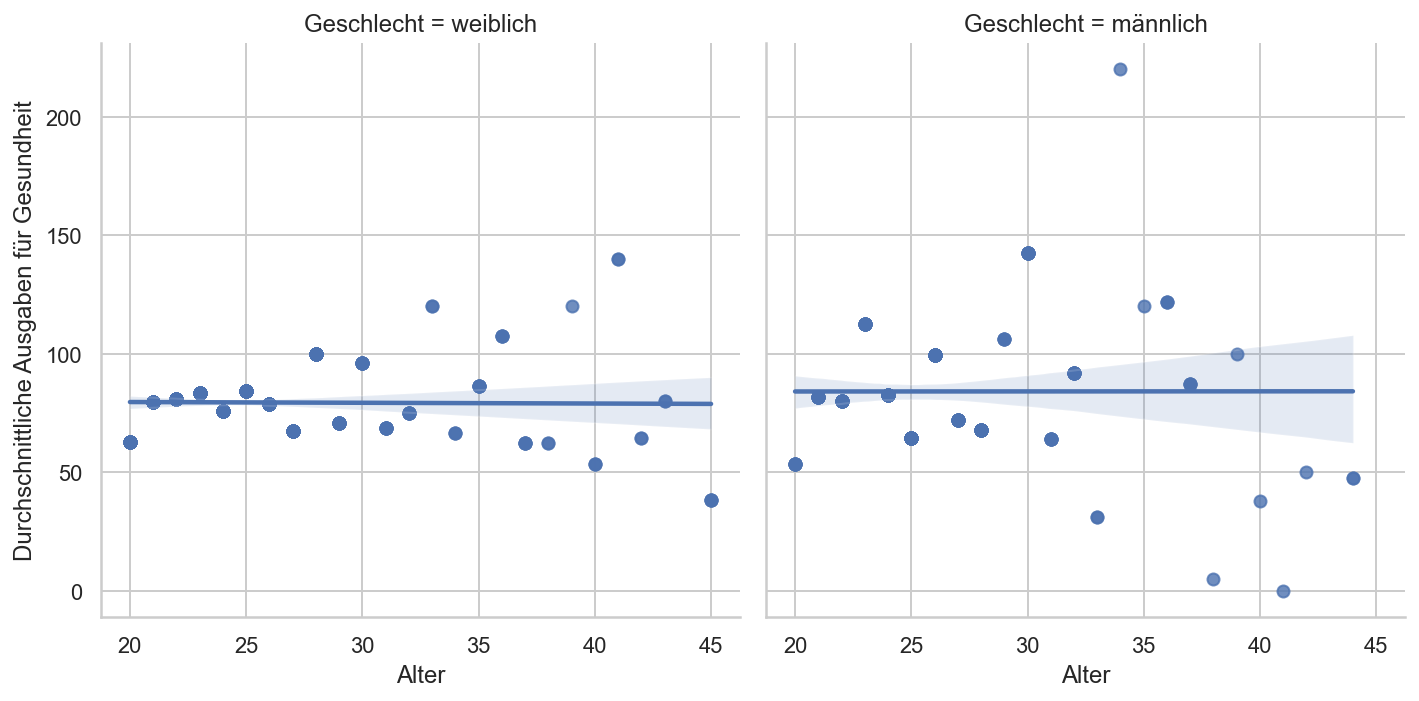

In [28]:
xy = sns.lmplot(x="Alter", y="Ausgaben_Alter_Mean", col="Geschlecht", data=df_red)
xy.set(ylabel="Durchschnittliche Ausgaben für Gesundheit")
plt.show()

## Korrelationsmatrix zwischen Alter & Ausgaben für Gesundheit bilden

In [29]:
df_red[["Alter", "Ausgaben_Gesundheit_Gesamt"]].corr()

,Alter,Ausgaben_Gesundheit_Gesamt
Alter,1.000000,0.000181
Ausgaben_Gesundheit_Gesamt,0.000181,1.000000


### Keine lineare Korrelation zu erkennen


# Hypothese 2: Die Verunsicherung durch Google ist abhängig vom Geschlecht oder Einkommen

## Chi-Quadrat-Unabhängigkeits-Test

In [30]:
import researchpy

crosstab, res = researchpy.crosstab(df_red["Geschlecht"], df_red["Googeln_verunsichert"], test = "chi-square")
res

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,9.4651
1,p-value =,0.0505
2,Cramer's V =,0.1361


In [31]:
crosstab

Googeln_verunsichert                                     \
Googeln_verunsichert trifft eher nicht zu trifft eher zu trifft teilweise zu   
Geschlecht                                                                     
männlich                               52             32                  36   
weiblich                               91             80                  83   
All                                   143            112                 119   

                                                                    
Googeln_verunsichert trifft voll zu trifft überhaupt nicht zu  All  
Geschlecht                                                          
männlich                         17                        38  175  
weiblich                         40                        42  336  
All                              57                        80  511

### Chi-Quadrat-Wert von 9.4651 ist kleiner als kritischer Wert von 9.49 (4 Freiheitsgrade & alpha = 0.5) => H0 (kein Zusammenhang zwischen Geschlecht und VErunsicherung durch Google) wird beibehalten 

In [32]:
crosstab, res = researchpy.crosstab(df_red["Einkommen"], df_red["Googeln_verunsichert"], test = "chi-square")
res

,Chi-square test,results
0,Pearson Chi-square ( 36.0) =,40.4230
1,p-value =,0.2812
2,Cramer's V =,0.1406


In [33]:
crosstab

Googeln_verunsichert                                     \
Googeln_verunsichert trifft eher nicht zu trifft eher zu trifft teilweise zu   
Einkommen                                                                      
<1000                                  20             17                  11   
<1500                                  25             22                  28   
<2000                                  47             45                  36   
<2500                                  26             19                  24   
<3000                                  15              3                  10   
<3500                                   4              1                   2   
<4000                                   4              2                   2   
<4500                                   0              1                   2   
<500                                    1              2                   3   
>=4500                                  1              0                   1   
All                                   143            112                 119   

                                                                    
Googeln_verunsichert trifft voll zu trifft überhaupt nicht zu  All  
Einkommen                                                           
<1000                             9                         9   66  
<1500                            13                        16  104  
<2000                            17                        23  168  
<2500                             5                        15   89  
<3000                             4                         8   40  
<3500                             3                         3   13  
<4000                             1                         3   12  
<4500                             1                         0    4  
<500                              0                         1    7  
>=4500                            4                         2    8  
All                              57                        80  511

### Chi-Quadrat-Wert ebenfalls kleiner als kritischer Wert => H0 wird beibehalten

# Hypothese 3: Das durchschnittliche Alter der FOM-Studenten in den ersten beiden Semestern ist kleiner als 25

## Histplot: Alter der Studierenden an der FOM (Semester 1-2) 

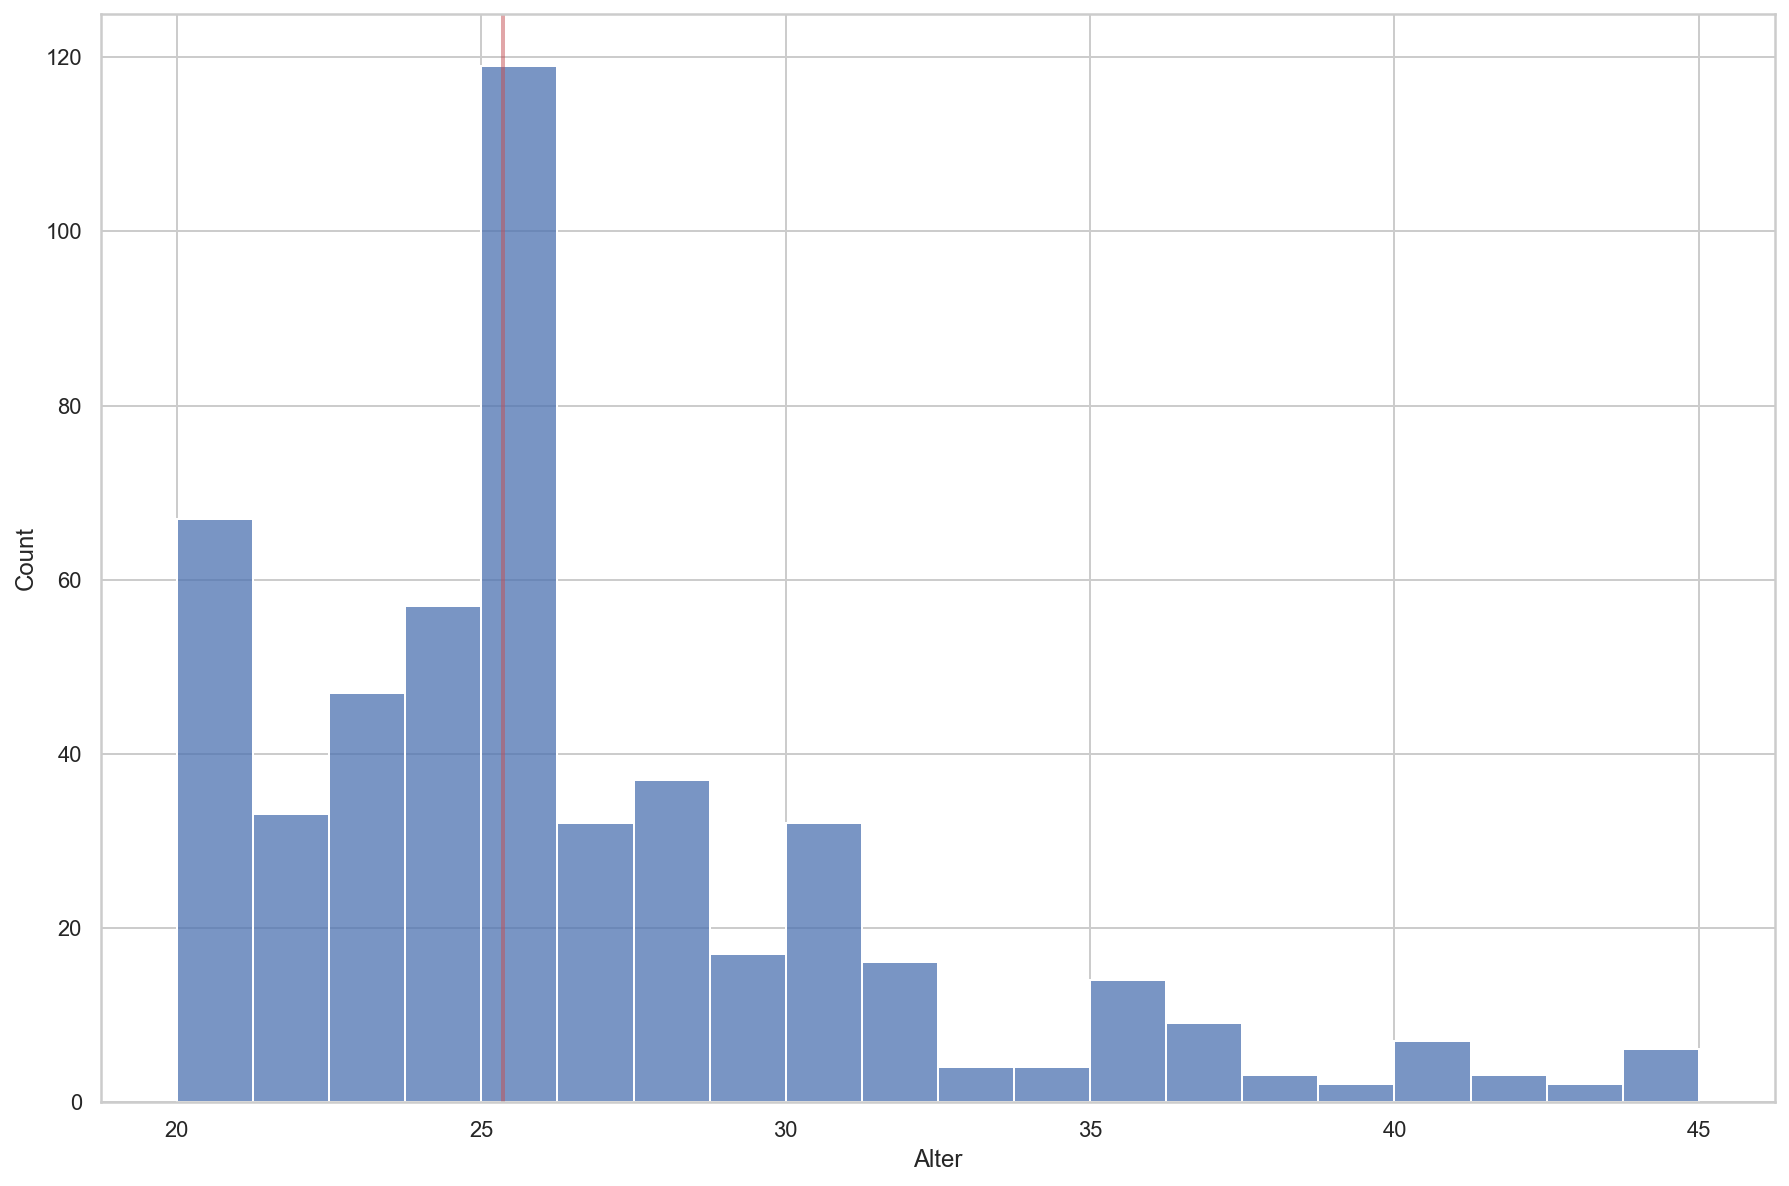

Das durchschnittliche Alter der FOM-Studierenden in den ersten beiden Semestern beträgt in dieser Stichprobe: 25.348039215686274


In [34]:
mean = df_red.loc[df_red["Semester"] == "1-2", "Alter"].mean()

sns.histplot(data=df_red, x = "Alter")
plt.axvline(x=mean, linewidth=2, color='r', label="mean", alpha=0.5)
plt.show()
print(f"Das durchschnittliche Alter der FOM-Studierenden in den ersten beiden Semestern beträgt in dieser Stichprobe: {str(mean)}")

## t-Test (Sample-Size: 25)

In [35]:
from scipy import stats as st
dt_samp = df_red[df_red["Semester"] == "1-2"].sample(25, random_state=20)
dt_samp.head()

tstatistic, p_val = st.ttest_1samp(a = dt_samp.loc[dt_samp["Semester"] == "1-2", "Alter"], popmean=25)
p_val = p_val/2 # Hälfte da sonst für zweiseitige Test
print(f"t-statistic: {tstatistic}, p-Value: {p_val}")

t-statistic: 1.5406577730392854, p-Value: 0.06824141589621302


### p-Wert > alpha = 0.05 => H0 kann nicht verworfen werden